# ITI123 Generative AI & Deep Learning Project
Model Development Focus<br>
Suah Yong Yi (6285578B)

## (1) Setup: data and library imports

Images imported from github in zip folder<br>
Github link: https://github.com/suahyongyi/object_detection_manpower/raw/main/data_yolov11.zip<br>
Roboflow dataset: https://app.roboflow.com/iti121deeplearning/staff_customer_annotation/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

In [1]:
%%capture
%%bash

# retrieve dataset for yolov11 (compatible with DETR)
wget -O data_yolov11.zip https://github.com/suahyongyi/object_detection_manpower/raw/main/data_yolov11.zip
mkdir -p datasets/data_v11/
unzip -o data_yolov11.zip -d datasets/data_v11/

In [2]:
%%capture
!pip install ultralytics

from ultralytics import settings
from ultralytics import YOLO

In [3]:
settings.update({"wandb": True,
                 "clearml": False,
                 "comet": False})

## (2) Model Training: experiments


### Run 1: YOLOv11 nano for baseline

In [5]:
model = YOLO("yolo11n.pt")
result = model.train(data="datasets/data_v11/data.yaml",
                     epochs=50,
                     imgsz=640,
                     batch=16,
                     device=0,
                     project='vietmoney_manpower2',
                     name='exp1_baseline_nano',
                     plots=True)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp1_baseline_nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Create a new API key at: https://wandb.ai/authorize?ref=models
wandb: Store your API key securely and do not share it.
wandb: Paste your API key and hit enter:

 ··········


wandb: Paste your API key and hit enter:

 ··········


wandb: Paste your API key and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: suah-yong-yi (suah-yong-yi-nus) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

wandb: WARNING Tried to log to step 50 that is less than the current step 51. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


lr/pg0,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁
lr/pg1,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▂▂▅▂▅▆▆▅▇█▇▇█▇▆▇█▇█▇██████████████████
metrics/mAP50-95(B),▂▁▂▁▃▂▂▄▅▄▅▆▇▆▆▇▅▇▇▇▇▇▇▇▇▇▇█▇▇██████████
metrics/precision(B),▁▄▇▆▄▄▅▆▇▆▇█▇▇▇▇▆█▇▇▇▇▇██▇█▇████████████
metrics/recall(B),█▇▂▁▅▃▆▆▅▆▇▇▇▇▇▆▇▇▇▇▇▇█▇▇▇▇█████▇▇█████▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Run 2: YOLOv11 small for size comparison
While off-the-shelf YOLOv11n had decent results in Run 1, a larger YOLOv11s model is trained to compare effects of increased model size.

In [6]:
model = YOLO("yolo11s.pt")
results_2 = model.train(data="datasets/data_v11/data.yaml",
                     epochs=50,
                     imgsz=640,
                    patience=10,
                     batch=16,
                     device=0,
                     project='vietmoney_manpower2',
                     name='exp2_baseline_small',
                     plots=True)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp2_baseline_small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, per

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

lr/pg0,▂▄▅▇████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▄▅▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▂▄▅▇█████▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▄▅▂▁▁▂▄▅▆▅▇▇▇▇▆▇▇▇▇▇█▇█▇▇▇▇█████████████
metrics/mAP50-95(B),▄▄▂▂▁▁▂▄▅▄▆▆▆▅▆▇▆▆▆▆▇▇▇▇▇▇▇▇▇███████████
metrics/precision(B),▃▆▃▁▃▁▄▄▅▆▆▆▆▆▆▆▆▆▇▇▇█▇▇▇▇▇▇████████████
metrics/recall(B),▄▅▂▃▂▁▂▃▄▅▆▇▆▇▆▇▆▇▆▆▇▇▇▇▇▇▇▇▇▇██████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Run 3: YOLOv11 nano model with color-safe data augmentation for data comparison
Apply gentle augmentations which do not overly distort image properties yet allow for learning on environmental variations.

In [7]:
model = YOLO("yolo11n.pt")
results_3 = model.train(data="datasets/data_v11/data.yaml",
                     epochs=50,
                     imgsz=640,
                     batch=16,
                     device=0,
                     project='vietmoney_manpower2',
                     name="exp3_conservative_aug",
    # color augmentations
    hsv_h = 0.0,      # no color changing to preserve integrity of staff uniform (default=0.015)
    hsv_s = 0.2,      # gentle saturation variance (default=0.7), lowered as CCTV saturation shouldnt vary too much
    hsv_v = 0.3,      # gentle brightness variance (default=0.4)

    # geometric augmentations
    degrees = 10.0,   # subtle tilt for CCTV shifts (default=0)
    translate = 0.1,  # maintain 10% shift for partial detections
    scale = 0.2,      # subtle zoom variance (default=0.5)
    fliplr = 0.5,     # maintain default
    flipud = 0.0,     # maintain default as all images should be upright

    # occlusion augmentations
    mosaic = 1.0,     # maintain default, enabled
    mixup = 0.0,      # maintain default, disable to prevent overcomplicating
    erasing = 0.2,    # lowered (default=0.4)
                     plots=True)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.2, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.2, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp3_conservative_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

lr/pg0,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▂▄▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▂▃▄▅▄▃▆▇▇▇▇▇█▇▇██▇███████████████████
metrics/mAP50-95(B),▁▁▂▁▂▃▄▃▂▄▆▆▅▆▆▇▇▆▇▆▇▇▇▇▇▇▇▇▇████▇██████
metrics/precision(B),▁▁█▅▅▅▆▄▆▆▇▇▇▇▇▇▇▇▇███████▇█████████████
metrics/recall(B),██▁▂▄▅▅▅▄▅▇▇▆▆▇▇▇▇▇▇█▇██▇███████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Run 4: YOLOv11 nano model with frozen backbone (10 layers) to compare transfer learning vs. full training.


In [8]:
model = YOLO("yolo11n.pt")
results_4 = model.train(data="datasets/data_v11/data.yaml",
                     epochs=50,
                     imgsz=640,
                     batch=16,
                     device=0,
                     project='vietmoney_manpower2',
                     name="exp4_frozen_colorsafe",

    # transfer learning
    freeze=10,        # freeze the first 10 layers (backbone)

    # keep data augmentations from Run 3
    # color augmentations
    hsv_h = 0.0,      # no color changing to preserve integrity of staff uniform (default=0.015)
    hsv_s = 0.2,      # gentle saturation variance (default=0.7), lowered as CCTV saturation shouldnt vary too much
    hsv_v = 0.3,      # gentle brightness variance (default=0.4)

    # geometric augmentations
    degrees = 10.0,   # subtle tilt for CCTV shifts (default=0)
    translate = 0.1,  # maintain 10% shift for partial detections
    scale = 0.2,      # subtle zoom variance (default=0.5)
    fliplr = 0.5,     # maintain default
    flipud = 0.0,     # maintain default as all images should be upright

    # occlusion augmentations
    mosaic = 1.0,     # maintain default, enabled
    mixup = 0.0,      # maintain default, disable to prevent overcomplicating
    erasing = 0.2,    # lowered (default=0.4)
                     plots=True)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.0, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp4_frozen_colorsafe, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

lr/pg0,▂▅▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▄▄▆▆▇▆▇▇▇▇██▇█████████████████████████
metrics/mAP50-95(B),▁▁▃▄▄▅▆▆▆▆▇▆▇▇▇▇▇▇▇█▇▇▇▇█▇███▇██████████
metrics/precision(B),▁▁█▆▇▇▇▆▇▇▇▇▇▇▇▇█████▇██████▇███████████
metrics/recall(B),██▁▃▅▅▆▆▆▆▆▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Run 5: YOLOv11 nano model with SGD optimizer instead of 'auto' which selects AdamW due to custom training setup, for optimiser comparison

In [9]:
model = YOLO("yolo11n.pt")
results_5 = model.train(data="datasets/data_v11/data.yaml",
                     epochs=50,
                     imgsz=640,
                     batch=16,
                     device=0,
                     project='vietmoney_manpower2',
                     name="exp7_optimiser_sgd_aug",

    # --- HYPERPARAMETER TUNING ---
    optimizer='SGD', # Switch from 'auto'/'SGD' to AdamW
    lr0=0.01,         # Initial Learning Rate (AdamW usually needs lower than SGD)

    # keep data augmentations from Run 3
    # color augmentations
    hsv_h = 0.0,      # no color changing to preserve integrity of staff uniform (default=0.015)
    hsv_s = 0.2,      # gentle saturation variance (default=0.7), lowered as CCTV saturation shouldnt vary too much
    hsv_v = 0.3,      # gentle brightness variance (default=0.4)

    # geometric augmentations
    degrees = 10.0,   # subtle tilt for CCTV shifts (default=0)
    translate = 0.1,  # maintain 10% shift for partial detections
    scale = 0.2,      # subtle zoom variance (default=0.5)
    fliplr = 0.5,     # maintain default
    flipud = 0.0,     # maintain default as all images should be upright

    # occlusion augmentations
    mosaic = 1.0,     # maintain default, enabled
    mixup = 0.0,      # maintain default, disable to prevent overcomplicating
    erasing = 0.2,    # lowered (default=0.4)
                     plots=True)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.2, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.2, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp7_optimiser_sgd_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, p

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

wandb: WARNING Tried to log to step 50 that is less than the current step 51. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


lr/pg0,▄▅▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▄▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,█▇▅▄▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
metrics/mAP50(B),▁▂▃▁▄▆▆▅▇▇▇▆▇▇▇▇██▇█████████████████████
metrics/mAP50-95(B),▁▁▂▁▃▃▄▃▅▅▆▄▅▅▆▆▆▆▅▇▇▇▇▇▇▇▅▆▇▇▇▇▇▇██████
metrics/precision(B),▁▁▁▅▅▇▅▇▇▇▆▇▇█▇▇██▇▇███▇████████████████
metrics/recall(B),▄█▇▂▁▄▁▅▃▅▃▆▄▅▅▇▆█▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Run 6: YOLOv11 nano model with further hyperparameter tuning

#### Exploration of values using built-in tune method

In [7]:
model = YOLO('yolo11n.pt')
results_tune = model.tune(
    data='datasets/data_v11/data.yaml',

    # configuration and iterations
    batch=8,             # reduced batch size to 8, as 16 crashed
    epochs=10,           # short cycles to check convergence speed
    iterations=8,        # limit to 8 trials for time savings
    plots=False,         # sisable plotting per-epoch to save slight I/O time
    save=False,          # don't save every checkpoint, only the final best
    val=True,            # validation is required to measure fitness (mAP)

    # starting hyperparameters follows Run 3, so tuner will start exploring from these values and the other defaults.
    # color aug
    hsv_h = 0.0,         # Start at 0.0 (No hue shift) - but potentially gets shifted
    hsv_s = 0.2,         # Start at 0.2 (Gentle saturation)
    hsv_v = 0.3,         # Start at 0.3 (Gentle brightness)
    # geometric aug
    degrees = 10.0,      # Start at 10 deg tilt
    translate = 0.1,     # Start at 10% shift
    scale = 0.2,         # Start at 20% zoom variance
    fliplr = 0.5,        # Standard flip
    flipud = 0.0,        # No upside down
    # occlusion aug
    mosaic = 1.0,        # Keep Mosaic enabled
    mixup = 0.0,         # Start DISABLED (Cleaner data)
    erasing = 0.2,       # Start at 20% chance
)

Tuner: Initialized Tuner instance with 'tune_dir=/content/runs/detect/tune3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/8 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.0, 'hsv_s': 0.2, 'hsv_v': 0.3, 'degrees': 10.0, 'translate': 0.1, 'scale': 0.2, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0, 'close_mosaic': 10}
Saved /content/runs/detect/tune3/tune_scatter_plots.png
Saved /content/runs/detect/tune3/tune_fitness.png

Tuner: 1/8 iterations complete ✅ (122.92s)
Tuner: Results saved to /content/runs/detect/tune3
Tuner: Best fitness=0.48212 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.90137, 'metrics/recall(B)': 0.90709, 'metrics/mAP50(B)': 0.94241, 'm

#### Train using best hyperparameters explored in the trials

In [8]:
import yaml

# load tuned hyperparameters
tune_file = '/content/runs/detect/tune3/best_hyperparameters.yaml'
with open(tune_file, 'r') as f:
    hyperparams = yaml.safe_load(f)
print("Loaded Hyperparameters:", hyperparams)

# train model using best hyperparameters
model = YOLO('yolo11n.pt')
results_6 = model.train(
    data='datasets/data_v11/data.yaml',
    project='vietmoney_manpower2',
    name='tuned_model',

    # readjustments of settings changed for trials
    epochs=50,          # restored to 50
    imgsz=640,
    batch=16,           # restored to 16
    device=0,
    plots=True,         # re-enable plots for the final report
    save=True,          # save checkpoints

    # apply tuned hyperparameters
    **hyperparams # unpacks dictionary into arguments
)

Loaded Hyperparameters: {'lr0': 0.01, 'lrf': 0.02505, 'momentum': 0.96336, 'weight_decay': 0.0, 'warmup_epochs': 3.00342, 'warmup_momentum': 0.95, 'box': 7.51334, 'cls': 0.50131, 'dfl': 1.62401, 'hsv_h': 0.00243, 'hsv_s': 0.3495, 'hsv_v': 0.30085, 'degrees': 9.9985, 'translate': 0.07095, 'scale': 0.19627, 'shear': 0.01716, 'perspective': 0.0, 'flipud': 0.00869, 'fliplr': 0.50011, 'bgr': 0.01123, 'mosaic': 0.94856, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.00036, 'close_mosaic': 9}
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.01123, box=7.51334, cache=False, cfg=None, classes=None, close_mosaic=9, cls=0.50131, compile=False, conf=None, copy_paste=0.00036, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=9.9985, deterministic=True, device=0, dfl=1.62401, dnn=False, dropout=0.0, dynamic=False, em

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: suah-yong-yi (suah-yong-yi-nus) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

lr/pg0,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▄▅▇█████▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▂▃▄▅▅▆▇▇▇▇▆▇▇█▇▇▇▇██▇██▇██████████████
metrics/mAP50-95(B),▂▁▂▂▃▃▃▄▄▅▅▅▅▆▆▆▅▆▇▇▇▇▇▇▇▇▇█▇█████▇█████
metrics/precision(B),▁▁▄▆▇▆▆▆▇▇▇▆▇▇█████▇███████▇▇███████████
metrics/recall(B),█▅▁▁▄▆▄▅▆▆▆▇▆▆▆▇▇▇▇▇▇█▇▇▇▇▇█▇▇██████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


## (3) Model Evaluation: weights from Run 3 as best model

In [12]:
import os
import shutil

# load the best model
best_model_path = '/content/runs/detect/vietmoney_manpower2/exp3_conservative_aug/weights/best.pt'
model = YOLO(best_model_path)

# evaluate on test set
metrics = model.val(split='test',
                    data='datasets/data_v11/data.yaml',
                    project='manpower_final_eval',
                    name='test_set_results')

# print metrics
print(f"\n--- FINAL REPORT METRICS ---")
print(f"mAP@50:    {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")
print(f"Recall:    {metrics.box.r.mean():.3f}") # Average Recall

🏆 Evaluating Champion Model on TEST Data...
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.6±9.5 MB/s, size: 44.1 KB)
val: Scanning /content/datasets/data_v11/test/labels... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 1.0Kit/s 0.0s
val: New cache created: /content/datasets/data_v11/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.8it/s 1.7s
                   all         40        108      0.934      0.826      0.941      0.588
              customer         39         55      0.946      0.727      0.915      0.563
                 staff         36         53      0.922      0.925      0.967      0.613
Speed: 8.7ms preprocess, 13.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/runs/dete

In [10]:
# load alternative tuned model (just for insights)
model_path = '/content/runs/detect/vietmoney_manpower2/exp7_optimiser_sgd_aug/weights/best.pt'
model = YOLO(model_path)

# evaluate on test set
metrics = model.val(split='test',
                    data='datasets/data_v11/data.yaml',
                    project='manpower_alt_eval',
                    name='test_set_results')

# print metrics
print(f"\n--- FINAL REPORT METRICS ---")
print(f"mAP@50:    {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")
print(f"Recall:    {metrics.box.r.mean():.3f}") # Average Recall

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1087.3±371.7 MB/s, size: 44.1 KB)
val: Scanning /content/datasets/data_v11/test/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 10.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.5it/s 2.0s
                   all         40        108      0.962      0.845      0.955        0.6
              customer         39         55      0.977      0.765      0.945      0.595
                 staff         36         53      0.947      0.925      0.966      0.606
Speed: 10.4ms preprocess, 17.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/manpower_alt_eval/test_set_results

--- FINAL REPORT METRICS ---
mAP@50:    0.955
mAP@50-95: 0.600

## (4) Framework Comparison: RT-DETR baseline without data augmentation

### Model Training

In [11]:
from ultralytics import RTDETR

# load pre-trained RT-DETR model
model = RTDETR('rtdetr-l.pt')

# train
results_rtdetr = model.train(
    data='datasets/data_v11/data.yaml',   # use existing YOLO data config, compatible
    epochs=20,                            # fewer epochs as it trains slower than YOLO
    imgsz=640,
    batch=4,                              # reduced batch size as RT-DETR is VRAM-heavy
    project='vietmoney_manpower2',
    name='exp_rtdetr_baseline'
)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data_v11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp_rtdetr_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

Overriding model.yaml nc=80 with nc=2
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/20      3.62G      1.772      0.926      1.706         28        640: 100% ━━━━━━━━━━━━ 75/75 1.9it/s 38.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 1.6it/s 7.0s
                   all         85        253      0.732       0.38      0.254      0.156

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/20      3.82G     0.3764      0.817     0.1557         21        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/20      3.82G      0.484      0.713     0.2404         16        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 5.6it/s 2.0s
                   all         85        253      0.651      0.665      0.578      0.373

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/20      3.82G     0.3494     0.7839     0.2107         17        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/20      3.82G     0.4694      0.671     0.2477         21        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 32.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.4it/s 1.7s
                   all         85        253       0.62      0.583      0.562      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/20      3.82G     0.4995     0.5792     0.2372         26        640: 0% ──────────── 0/75  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/20      3.82G      0.479     0.6222     0.2437         19        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.6it/s 1.7s
                   all         85        253      0.846      0.202      0.226      0.124

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/20      3.82G     0.4143     0.7656     0.2492         21        640: 0% ──────────── 0/75  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/20      3.82G     0.4615     0.5937     0.2326         20        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 32.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.3it/s 1.7s
                   all         85        253      0.731      0.748      0.778      0.491

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/20      3.82G     0.2941     0.5097     0.1389         27        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/20      3.82G     0.4161     0.5859     0.2046         24        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.2it/s 1.8s
                   all         85        253      0.809      0.796      0.829      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/20      3.82G     0.4672     0.4446     0.2212         25        640: 0% ──────────── 0/75  0.6s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/20      3.82G     0.4011     0.5183     0.1973         28        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 33.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 5.4it/s 2.0s
                   all         85        253      0.942      0.842      0.909      0.622

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       8/20      3.82G     0.3525     0.4378     0.2242         13        640: 0% ──────────── 0/75  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/20      3.82G     0.3835     0.4937     0.1885         19        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 33.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.2it/s 1.8s
                   all         85        253      0.949      0.811      0.901      0.606

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       9/20      3.82G     0.4253     0.5627     0.2376         18        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/20      3.82G     0.3935     0.5183     0.1988         16        640: 100% ━━━━━━━━━━━━ 75/75 2.2it/s 34.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.3it/s 1.7s
                   all         85        253       0.86      0.803      0.863      0.573

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      10/20      3.82G     0.4588     0.5674     0.2353         21        640: 0% ──────────── 0/75  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/20      3.82G     0.3682     0.5204      0.182         22        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 5.7it/s 1.9s
                   all         85        253       0.93      0.883      0.923      0.637
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      11/20      3.82G     0.5084     0.6598      0.324         11        640: 0% ──────────── 0/75  0.8s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      11/20      3.82G     0.3108     0.4472     0.1945         15        640: 100% ━━━━━━━━━━━━ 75/75 2.2it/s 33.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 5.9it/s 1.9s
                   all         85        253      0.911      0.856      0.912      0.634

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      12/20      3.82G     0.2351     0.4314     0.1021         11        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      12/20      3.82G     0.3111     0.4559      0.197         15        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 32.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.4it/s 1.7s
                   all         85        253      0.945      0.882      0.929      0.646

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      13/20      3.82G     0.2524     0.3809     0.1449         19        640: 0% ──────────── 0/75  0.6s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      13/20      3.82G      0.291     0.4135     0.1732         12        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.2it/s 1.8s
                   all         85        253      0.957      0.895      0.949       0.66

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/20      3.82G     0.1671     0.3515    0.07084         14        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      14/20      3.82G     0.2813     0.3968     0.1714         12        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.0it/s 1.8s
                   all         85        253      0.955      0.894      0.946      0.667

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/20      3.82G     0.2403     0.3134     0.1341         11        640: 0% ──────────── 0/75  0.6s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      15/20      3.82G     0.2809      0.383     0.1639         10        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.5it/s 1.7s
                   all         85        253      0.953      0.918      0.949      0.661

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/20      3.82G     0.3056     0.4055     0.1493         14        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      16/20      3.82G     0.2583     0.3591     0.1504         12        640: 100% ━━━━━━━━━━━━ 75/75 2.3it/s 32.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.2it/s 1.8s
                   all         85        253      0.949      0.914      0.958       0.66

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/20      3.82G     0.2491     0.2996     0.0846         15        640: 0% ──────────── 0/75  0.6s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      17/20      3.82G     0.2503     0.3485     0.1449         12        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.4it/s 1.7s
                   all         85        253      0.954      0.912      0.938      0.645

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/20      3.82G      0.226     0.3243     0.1492         12        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      18/20      3.82G     0.2498       0.35     0.1459         11        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.3it/s 1.7s
                   all         85        253      0.961      0.932      0.958      0.675

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/20      3.82G     0.2617     0.2658     0.2009         12        640: 0% ──────────── 0/75  0.5s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      19/20      3.82G      0.237     0.3317     0.1347         14        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.3it/s 1.7s
                   all         85        253      0.962      0.917      0.959       0.67

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/20      3.82G     0.1627     0.3131    0.09133          9        640: 0% ──────────── 0/75  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:865: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:160.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      20/20      3.82G     0.2376     0.3413     0.1362         20        640: 100% ━━━━━━━━━━━━ 75/75 2.4it/s 31.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 6.2it/s 1.8s
                   all         85        253      0.949      0.932       0.95      0.676

20 epochs completed in 0.243 hours.
Optimizer stripped from /content/runs/detect/vietmoney_manpower2/exp_rtdetr_baseline/weights/last.pt, 66.2MB
Optimizer stripped from /content/runs/detect/vietmoney_manpower2/exp_rtdetr_baseline/weights/best.pt, 66.2MB

Validating /content/runs/detect/vietmoney_manpower2/exp_rtdetr_baseline/weights/best.pt...
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
rt-detr-l summary: 310 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 4.8it/s 2.3s
                   all        

lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▁▄▄▁▆▇█▇▇███████████
metrics/mAP50-95(B),▁▄▃▁▆▆▇▇▇█▇█████████
metrics/precision(B),▃▂▁▆▃▅██▆▇▇█████████
metrics/recall(B),▃▅▅▁▆▇▇▇▇█▇█████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


### Model Evaluation

In [14]:
detr_model_path = '/content/runs/detect/vietmoney_manpower2/exp_rtdetr_baseline/weights/best.pt'
detr_model = YOLO(detr_model_path)

# evaluate on test set
metrics = detr_model.val(split='test',
                    data='datasets/data_v11/data.yaml',
                    project='detr_eval',
                    name='test_set_results')

# print metrics
print(f"\n--- FINAL REPORT METRICS ---")
print(f"mAP@50:    {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")
print(f"Recall:    {metrics.box.r.mean():.3f}") # Average Recall

Evaluating DETR Model on TEST Data...
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
rt-detr-l summary: 310 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1362.6±435.6 MB/s, size: 43.2 KB)
val: Scanning /content/datasets/data_v11/test/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 11.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.1it/s 2.8s
                   all         40        108      0.933      0.935      0.947      0.675
              customer         39         55      0.894      0.927      0.934       0.66
                 staff         36         53      0.972      0.943       0.96      0.691
Speed: 8.5ms preprocess, 48.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/runs/detect/detr_eval/test_set_results

--- FINAL REPORT METRICS ---
mAP@50:

## (5) Business Metrics Evaluation

In [5]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### Metrics Report

In [10]:
# configurations
MODEL_PATH = '/content/best.pt'
TEST_IMAGES_DIR = 'datasets/data_v11/test/images'
TEST_LABELS_DIR = 'datasets/data_v11/test/labels'
CLASS_MAP = {0: 'customer', 1: 'staff'} # follows dataset yaml file

def analyze_sparse_counts(model_path, images_dir, labels_dir, class_map):
    model = YOLO(model_path)
    results_data = []

    # Get list of images
    image_files = glob.glob(os.path.join(images_dir, '*.jpg')) + glob.glob(os.path.join(images_dir, '*.png'))
    print(f"Analyzing {len(image_files)} images...")

    for img_path in image_files:
        filename = os.path.basename(img_path)
        label_file = os.path.join(labels_dir, os.path.splitext(filename)[0] + '.txt')

        # 1. Get Ground Truth
        gt_counts = {'staff': 0, 'customer': 0}
        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                for line in f:
                    cls_id = int(line.split()[0])
                    name = class_map.get(cls_id)
                    if name in gt_counts: gt_counts[name] += 1

        # 2. Get Predictions
        results = model.predict(img_path, conf=0.25, verbose=False)
        pred_counts = {'staff': 0, 'customer': 0}
        for box in results[0].boxes:
            cls_id = int(box.cls[0])
            name = class_map.get(cls_id)
            if name in pred_counts: pred_counts[name] += 1

        # 3. Store Data
        results_data.append({
            'filename': filename,
            'GT_Staff': gt_counts['staff'],
            'Pred_Staff': pred_counts['staff'],
            'GT_Cust': gt_counts['customer'],
            'Pred_Cust': pred_counts['customer']
        })

    df = pd.DataFrame(results_data)

    # --- METRIC 1: EXACT MATCH RATE ---
    # How often is the count EXACTLY correct?
    staff_exact = (df['GT_Staff'] == df['Pred_Staff']).mean() * 100
    cust_exact = (df['GT_Cust'] == df['Pred_Cust']).mean() * 100

    # --- METRIC 2: TOLERANCE MATCH (Off by <= 1) ---
    # How often is it "good enough"?
    staff_tol = (abs(df['GT_Staff'] - df['Pred_Staff']) <= 1).mean() * 100
    cust_tol = (abs(df['GT_Cust'] - df['Pred_Cust']) <= 1).mean() * 100

    # --- METRIC 3: WAPE (Weighted Absolute Percentage Error) ---
    # Total Error / Total People. Handles "Divide by Zero" gracefully.
    def calculate_wape(gt_col, pred_col):
        total_error = abs(df[gt_col] - df[pred_col]).sum()
        total_actual = df[gt_col].sum()
        return (total_error / total_actual) * 100 if total_actual > 0 else 0.0

    staff_wape = calculate_wape('GT_Staff', 'Pred_Staff')
    cust_wape = calculate_wape('GT_Cust', 'Pred_Cust')

    print("\n" + "="*50)
    print("📊 COUNT PERFORMANCE REPORT")
    print("="*50)
    print(f"Total Test Images: {len(df)}")
    print("-" * 30)
    print(f"STAFF DETECTION:")
    print(f"  Exact Match Rate:    {staff_exact:.1f}%  (Perfect count)")
    print(f"  Tolerance Rate (+/-1): {staff_tol:.1f}%  (Usable count)")
    print(f"  Global Error (WAPE): {staff_wape:.1f}%  (Lower is better)")
    print("-" * 30)
    print(f"CUSTOMER DETECTION:")
    print(f"  Exact Match Rate:    {cust_exact:.1f}%")
    print(f"  Tolerance Rate (+/-1): {cust_tol:.1f}%")
    print(f"  Global Error (WAPE): {cust_wape:.1f}%")
    print("="*50)

    # --- VISUALISATION: CONFUSION MATRIX ---
    # This shows WHERE the model is failing (e.g., confusing 1 person for 2)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Helper to plot matrix
    def plot_cm(gt, pred, ax, title):
        # Get unique count values to define grid size
        max_val = max(gt.max(), pred.max())
        labels = range(max_val + 1)
        cm = confusion_matrix(gt, pred, labels=labels)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(title)
        ax.set_xlabel("Predicted Count")
        ax.set_ylabel("Actual Count")
        ax.invert_yaxis()

    plot_cm(df['GT_Staff'], df['Pred_Staff'], axes[0], "Staff Count Confusion Matrix")
    plot_cm(df['GT_Cust'], df['Pred_Cust'], axes[1], "Customer Count Confusion Matrix")

    plt.tight_layout()
    plt.show()

    return df

Analyzing 40 images...

📊 COUNT PERFORMANCE REPORT
Total Test Images: 40
------------------------------
STAFF DETECTION:
  Exact Match Rate:    77.5%  (Perfect count)
  Tolerance Rate (+/-1): 92.5%  (Usable count)
  Global Error (WAPE): 22.6%  (Lower is better)
------------------------------
CUSTOMER DETECTION:
  Exact Match Rate:    65.0%
  Tolerance Rate (+/-1): 97.5%
  Global Error (WAPE): 27.3%


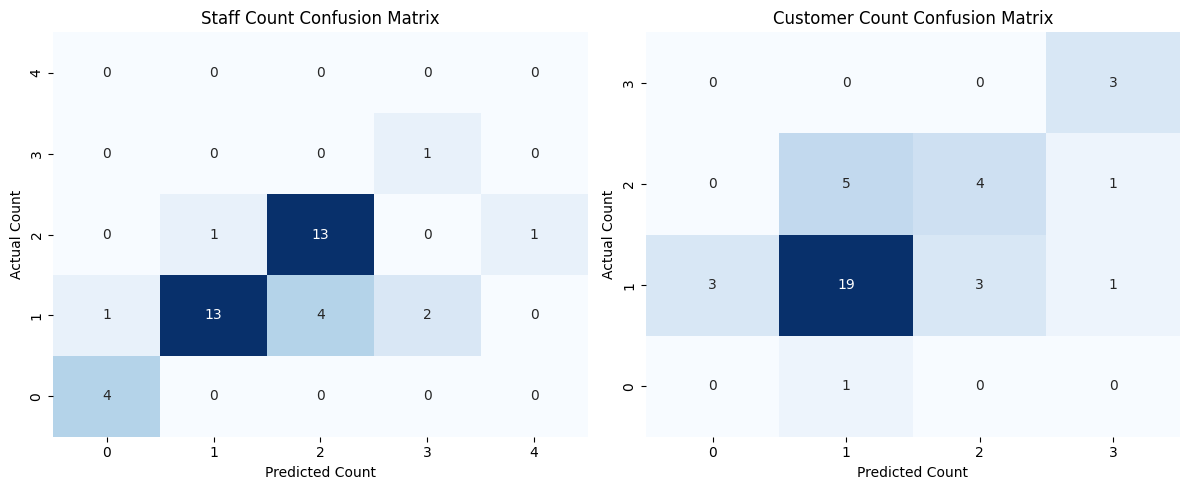

In [11]:
# run evaluation
df_metrics = analyze_sparse_counts(MODEL_PATH, TEST_IMAGES_DIR, TEST_LABELS_DIR, CLASS_MAP)

### Error visualisation

In [29]:
import matplotlib.pyplot as plt
import os
import math

def visualize_all_errors(df, model_path, images_dir):
    """
    Visualises ALL images where EITHER Staff OR Customer counts were wrong.
    Shows Total, Staff, and Customer metrics clearly in the title.
    """
    model = YOLO(model_path)

    # 1. Filter for ANY error (Staff OR Customer mismatch)
    # We look for rows where the predicted count does not match the ground truth
    error_df = df[
        (df['GT_Staff'] != df['Pred_Staff']) |
        (df['GT_Cust'] != df['Pred_Cust'])
    ]

    if len(error_df) == 0:
        print("✅ No errors found in the test set!")
        return

    print(f"🔍 Found {len(error_df)} images with counting errors. Generating plots...")

    # 2. Setup Grid Plot (Dynamic size based on number of errors)
    num_errors = len(error_df)
    cols = 5
    rows = math.ceil(num_errors / cols)

    # Adjust figsize: Taller to fit the text
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3.5 * rows))

    # Handle single image case (axes is not a list)
    if num_errors == 1: axes = [axes]
    else: axes = axes.flatten()

    # 3. Loop through errors
    for idx, (i, row) in enumerate(error_df.iterrows()):
        img_filename = row['filename'] # Ensure your DF has 'filename' column
        img_path = os.path.join(images_dir, img_filename)

        # A. Run Inference to get the visual box
        results = model.predict(img_path, conf=0.25, verbose=False)
        img_array = results[0].plot() # BGR numpy array
        img_rgb = img_array[..., ::-1] # Convert to RGB

        # B. Calculate Metrics
        gt_s, pred_s = row['GT_Staff'], row['Pred_Staff']
        gt_c, pred_c = row['GT_Cust'], row['Pred_Cust']

        gt_total = gt_s + gt_c
        pred_total = pred_s + pred_c

        diff_s = pred_s - gt_s
        diff_c = pred_c - gt_c
        diff_total = pred_total - gt_total

        # C. Create the Title String
        def fmt_diff(d): return f"+{d}" if d > 0 else str(d)

        title = (
            f"Overall: GT {gt_total} | Pred {pred_total} (Diff {fmt_diff(diff_total)})\n"
            f"Staff: GT {gt_s} | Pred {pred_s} ({fmt_diff(diff_s)})\n"
            f"Customer: GT {gt_c} | Pred {pred_c} ({fmt_diff(diff_c)})"
        )

        # D. Plot
        ax = axes[idx]
        ax.imshow(img_rgb)
        ax.set_title(title, fontsize=8, fontweight='bold', color='darkblue', pad=0)
        ax.axis('off') # Hide x/y axes

    # Turn off empty subplots
    for j in range(idx + 1, len(axes)):
        axes[j].axis('off')
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

🔍 Found 19 images with counting errors. Generating plots...


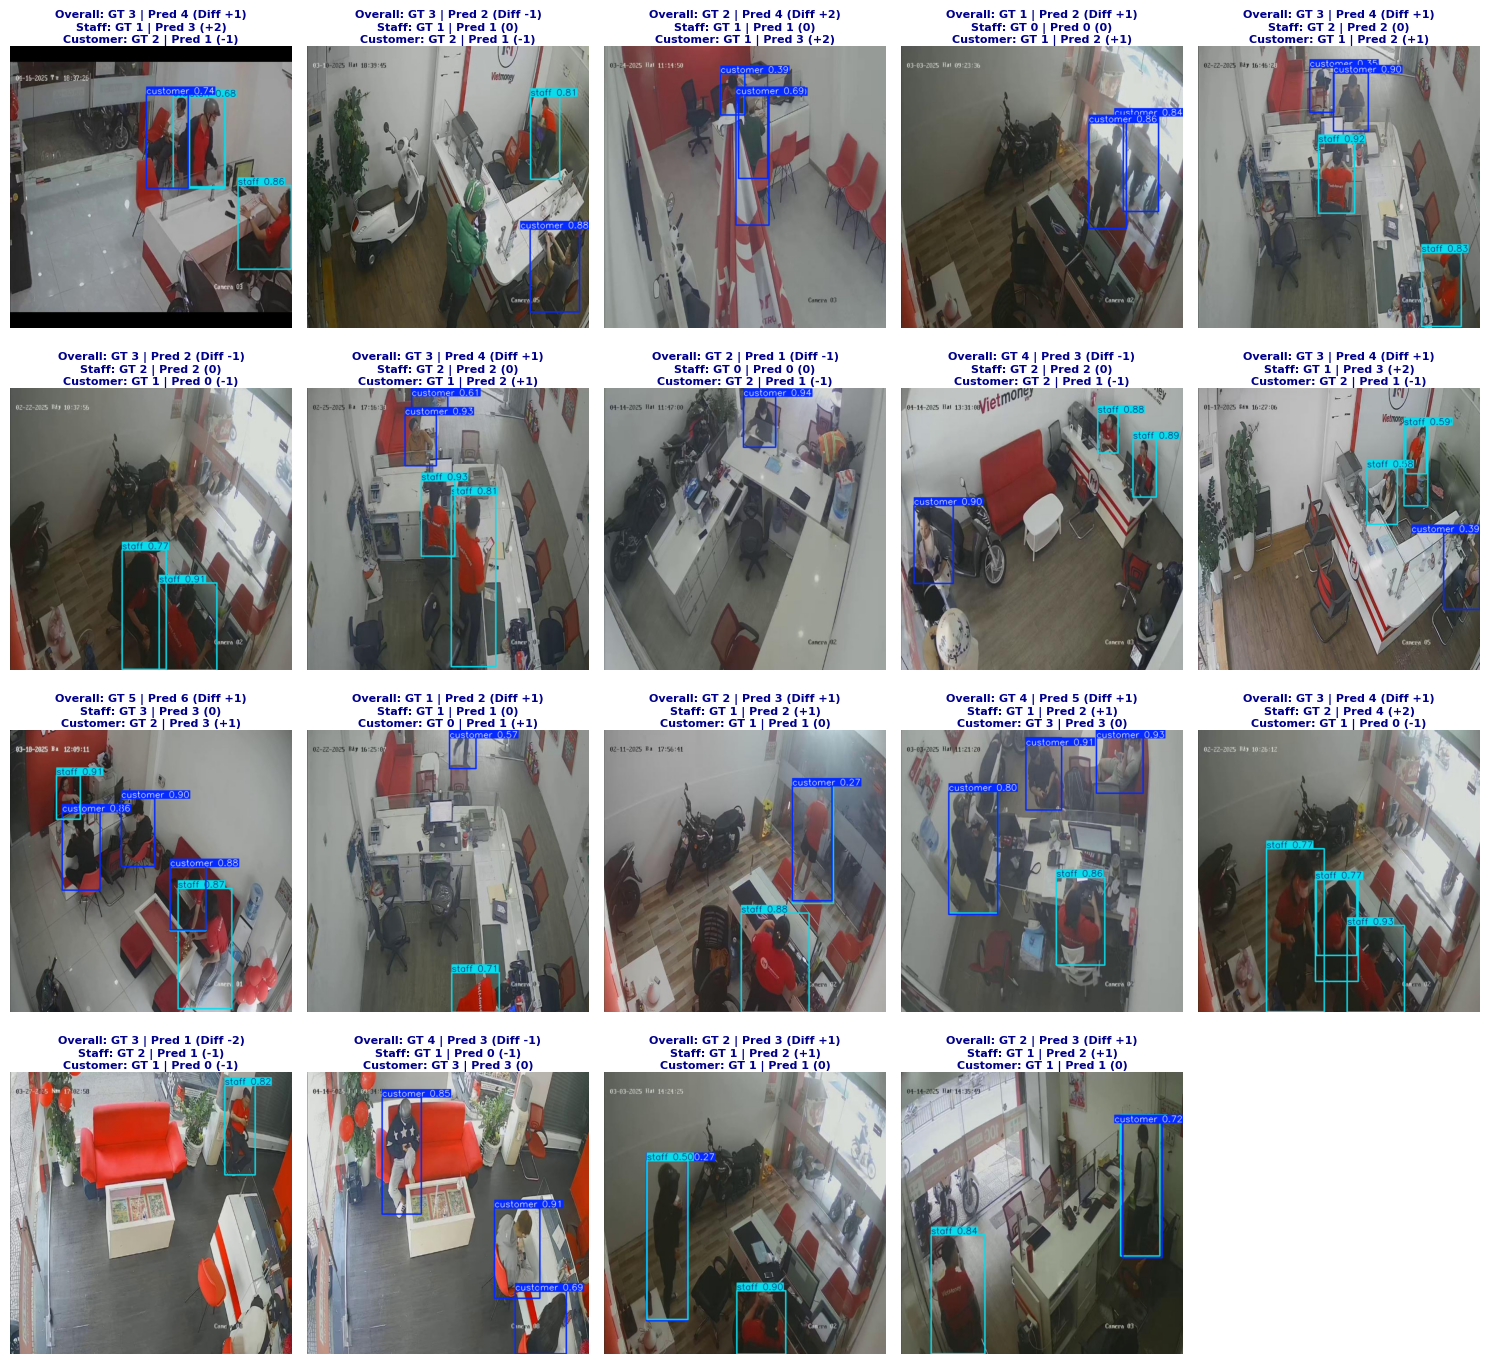

In [30]:
# --- RUN THE VISUALISATION ---
# Ensure 'df_metrics' is the dataframe you created in the previous step
visualize_all_errors(df_metrics, MODEL_PATH, TEST_IMAGES_DIR)